In [ ]:
import bliss
import torch
import matplotlib.pyplot as plt 

from einops import rearrange

In [ ]:
from bliss.encoders.deblend import GalaxyEncoder

enc = GalaxyEncoder("../../models/autoencoder_42_42.pt")

In [ ]:
ptiles = torch.randn(2, 1, 53, 53)
ptiles.shape

torch.Size([2, 1, 53, 53])

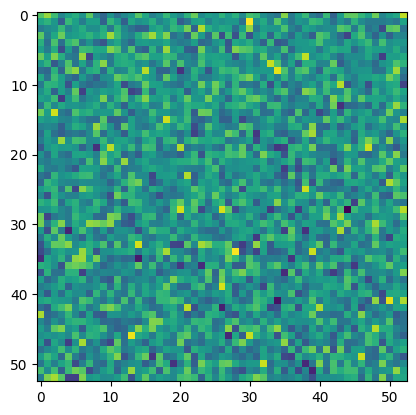

In [ ]:
plt.imshow(ptiles[0,0])

In [ ]:
locs = torch.rand(2, 2)

In [ ]:
tile_slen = 5
bp = 24

y, x = locs * tile_slen + bp
r = (y // 1).long()
c = (x // 1).long()



In [ ]:
r

tensor([26, 24])

In [ ]:
npt, _, h ,w = ptiles.shape

# grids
xx = torch.arange(ptiles.shape[-1], device=ptiles.device)
gy, gx = torch.meshgrid(xx, xx, indexing="ij")
gyy = rearrange(gy, "h w -> 1 1 h w").expand(len(ptiles), 1, h, w)
gxx = rearrange(gx, "h w -> 1 1 h w").expand(len(ptiles), 1, h, w)

cond1 = torch.abs(gyy - rearrange(r, "n -> n 1 1 1")) <= bp
cond2 = torch.abs(gxx - rearrange(c, "n -> n 1 1 1")) <= bp

In [ ]:
cond.shape

NameError: name 'cond' is not defined

In [ ]:
ptiles.shape

torch.Size([2, 1, 53, 53])

In [ ]:
cond = torch.logical_and(cond1, cond2)

final_ptiles = rearrange(
    ptiles[cond], "(b h w) -> b 1 h w", h=2*bp+1, w=2*bp+1
)

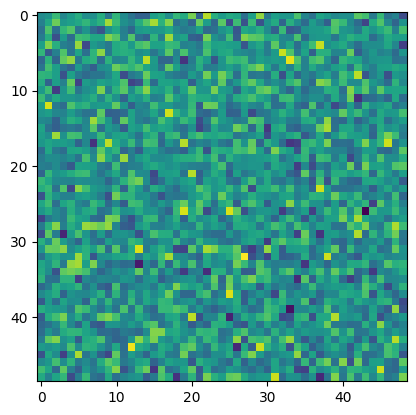

In [ ]:
plt.imshow(final_ptiles[0, 0])

# Try with galaxies

In [ ]:

import matplotlib.pyplot as plt
from astropy.table import Table
from bliss.datasets.table_utils import column_to_tensor
from bliss.datasets.lsst import get_default_lsst_psf
from bliss.datasets.render_utils import render_one_galaxy, sample_galaxy_params

import torch

In [ ]:
# prepare bigger dataset
catsim_table = Table.read("../../../data/OneDegSq.fits")
all_star_mags = column_to_tensor(Table.read("../../../data/stars_med_june2018.fits"), "i_ab")
psf = get_default_lsst_psf()
new_table = catsim_table[catsim_table['i_ab'] < 23]

n_samples = 6

In [ ]:
gparams, _ = sample_galaxy_params(new_table, 6, 6)
gparams.shape

torch.Size([6, 11])

In [ ]:
# makes tiles of 53x53
ptiles1 = [render_one_galaxy(gparam, psf, 53, offset=torch.tensor([-2.0, -2.0])) for gparam in gparams]
ptiles2 = [render_one_galaxy(gparam, psf, 53, offset=torch.tensor([2.0, 2.0])) for gparam in gparams]
ptiles = torch.cat([ptiles1, ptiles2], axis=0)
ptiles.shape

TypeError: expected Tensor as element 0 in argument 0, but got list

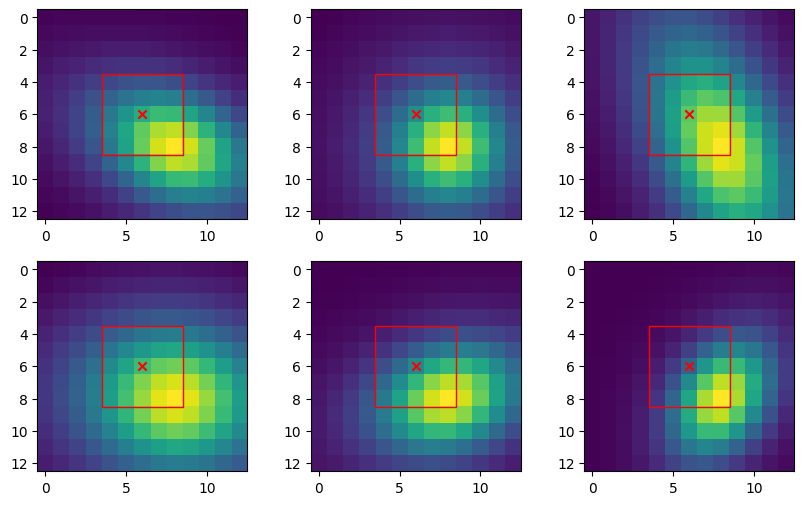

In [ ]:

import matplotlib.patches as patches


# plot them , all should be centered corner pixel
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
trim = 20
for ii, ax in enumerate(axes.flat):
    ax.imshow(ptiles[ii, trim:-trim, trim:-trim].numpy(), interpolation='none')

    ax.scatter(53/2-0.5-trim, 53/2-0.5-trim, color='r', marker='x')

    # square of 4 pixels centered (not possible!, odd image), so not aligned with pixels
    rect = patches.Rectangle((53/2-0.5-2.5-trim, 53/2-0.5-2.5-trim), 5, 5, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

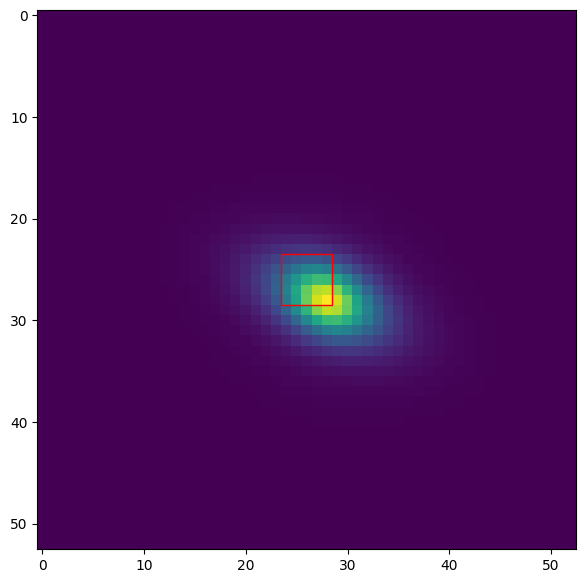

In [ ]:
fig, ax =plt.subplots(1,1,figsize=(7,7))
ax.imshow(ptiles[0])
rect = patches.Rectangle((53/2-0.5-2.5, 53/2-0.5-2.5), 5, 5, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

In [ ]:
fptiles = enc._crop_ptiles(ptiles.reshape(6,1,53,53), torch.full((6,2), 0.99))

In [ ]:
fptiles.shape

torch.Size([6, 1, 49, 49])

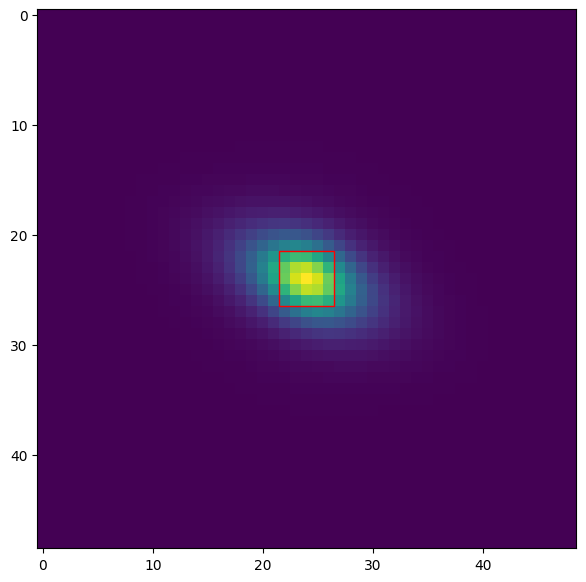

In [ ]:
fig, ax =plt.subplots(1,1,figsize=(7,7))
ax.imshow(fptiles[0, 0])
rect = patches.Rectangle((49/2-0.5-2.5, 49/2-0.5-2.5), 5, 5, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
# plt.scatter(24, 24, marker='x', color='r')